In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Load the dataset
df = pd.read_csv('Loans_Dataset.csv')

# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nTarget Variable Distribution:")
print(df['result'].value_counts())

Dataset Shape: (1004, 6)

Column Names: ['initial_payment', 'last_payment', 'credit_score', 'house_number', 'sum', 'result']

First 5 rows:
   initial_payment  last_payment  credit_score  house_number    sum result
0              201         10018           250          3046  13515    yes
1              205         10016           395          3044  13660    yes
2              257         10129           109          3251  13746    yes
3              246         10064           324          3137  13771    yes
4              117         10115           496          3094  13822    yes

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum           

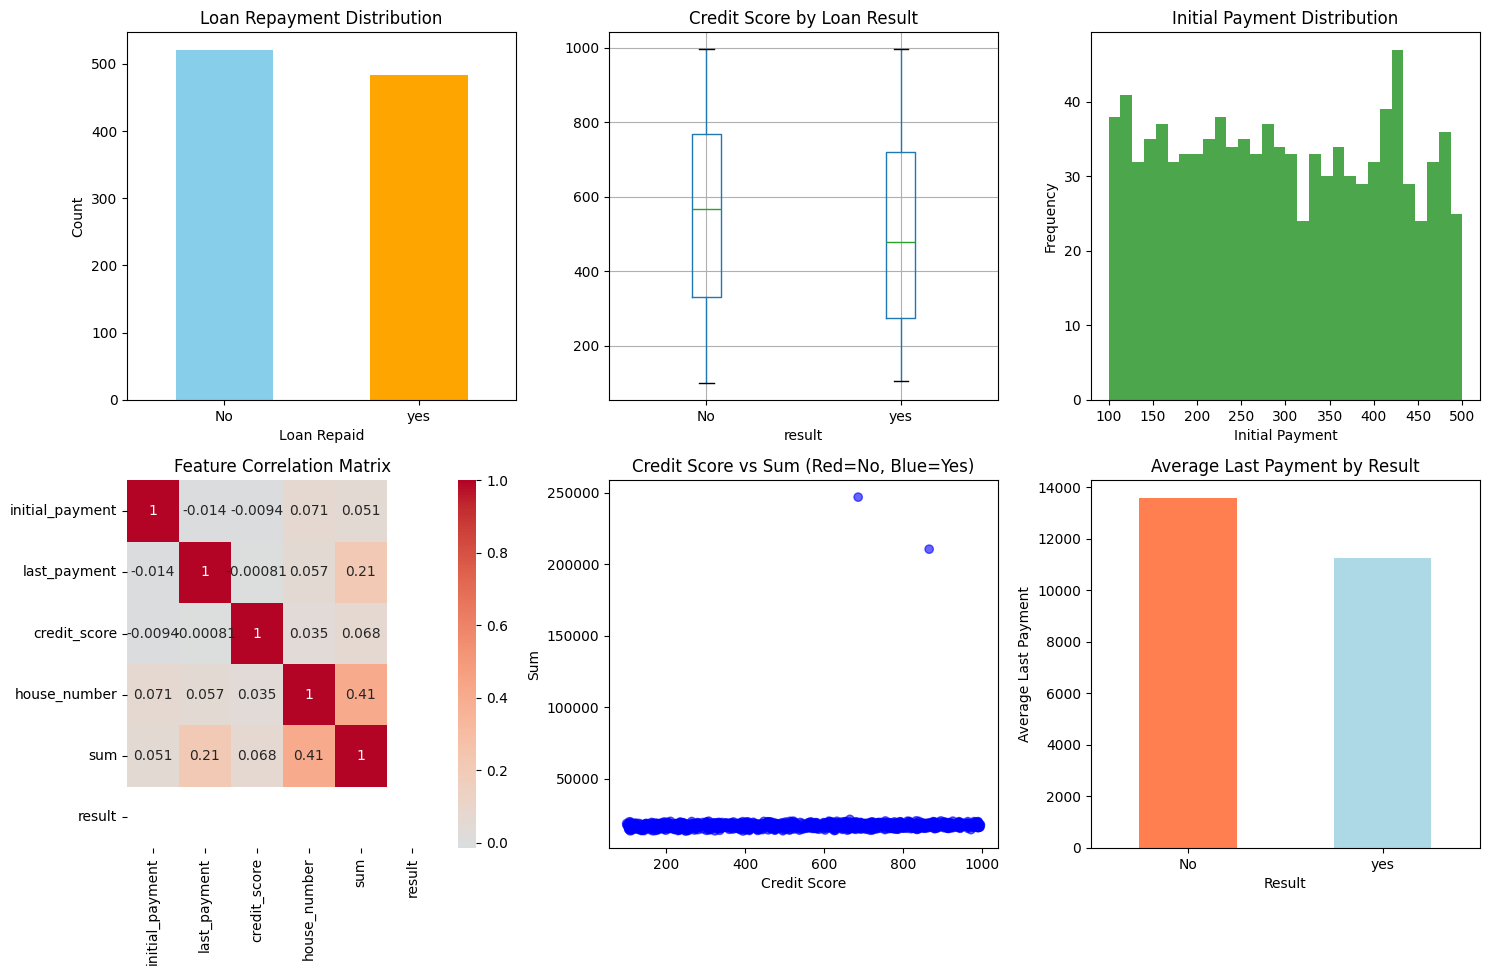

In [2]:
# Data Exploration and Visualization
plt.figure(figsize=(15, 10))

# 1. Target variable distribution
plt.subplot(2, 3, 1)
df['result'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Loan Repayment Distribution')
plt.xlabel('Loan Repaid')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 2. Credit score distribution by result
plt.subplot(2, 3, 2)
df.boxplot(column='credit_score', by='result', ax=plt.gca())
plt.title('Credit Score by Loan Result')
plt.suptitle('')

# 3. Initial payment distribution
plt.subplot(2, 3, 3)
plt.hist(df['initial_payment'], bins=30, alpha=0.7, color='green')
plt.title('Initial Payment Distribution')
plt.xlabel('Initial Payment')
plt.ylabel('Frequency')

# 4. Correlation heatmap
plt.subplot(2, 3, 4)
# Convert result to numeric for correlation
df_numeric = df.copy()
df_numeric['result'] = df_numeric['result'].map({'yes': 1, 'no': 0})
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

# 5. Sum vs Credit Score scatter
plt.subplot(2, 3, 5)
colors = ['red' if x == 'no' else 'blue' for x in df['result']]
plt.scatter(df['credit_score'], df['sum'], c=colors, alpha=0.6)
plt.xlabel('Credit Score')
plt.ylabel('Sum')
plt.title('Credit Score vs Sum (Red=No, Blue=Yes)')

# 6. Feature distributions by result
plt.subplot(2, 3, 6)
df.groupby('result')['last_payment'].mean().plot(kind='bar', color=['coral', 'lightblue'])
plt.title('Average Last Payment by Result')
plt.xlabel('Result')
plt.ylabel('Average Last Payment')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [3]:
# Phase 3: Decision Tree Implementation

# Prepare the data
X = df.drop('result', axis=1)  # Features
y = df['result']  # Target variable

print("Features:", X.columns.tolist())
print("Target variable unique values:", y.unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Testing target distribution:\n{y_test.value_counts()}")

# Create and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,  # Prevent overfitting
    min_samples_split=20,
    min_samples_leaf=10
)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

print("\nDecision Tree Model trained successfully!")
print("Model parameters:", dt_classifier.get_params())

Features: ['initial_payment', 'last_payment', 'credit_score', 'house_number', 'sum']
Target variable unique values: ['yes' 'No']

Training set size: 803 samples
Testing set size: 201 samples
Training target distribution:
result
No     417
yes    386
Name: count, dtype: int64
Testing target distribution:
result
No     104
yes     97
Name: count, dtype: int64

Decision Tree Model trained successfully!
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


Model Accuracy: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       104
         yes       1.00      1.00      1.00        97

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201


Confusion Matrix:
[[104   0]
 [  0  97]]


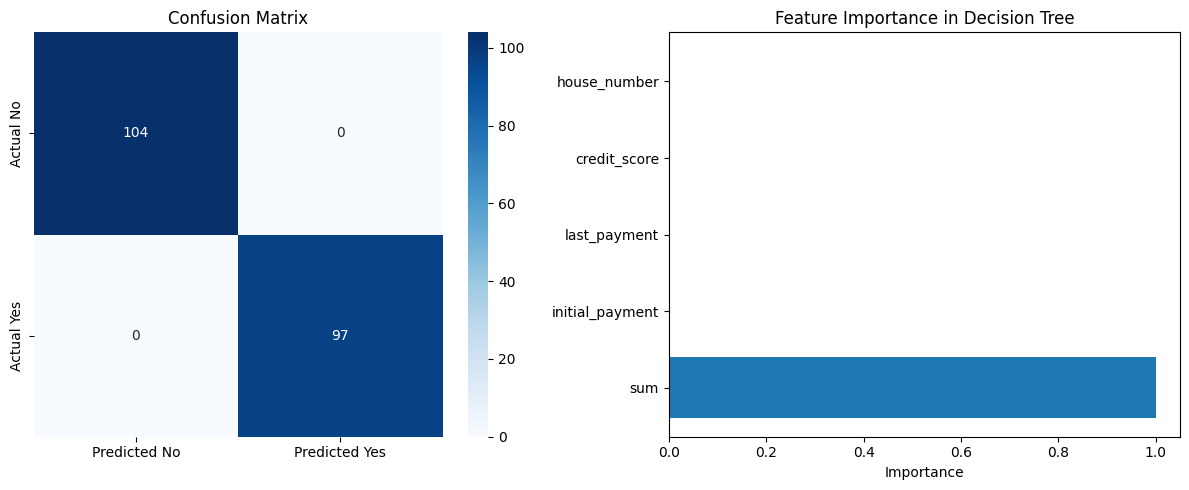


Feature Importance Ranking:
1. sum: 1.0000
2. initial_payment: 0.0000
3. last_payment: 0.0000
4. credit_score: 0.0000
5. house_number: 0.0000

=== MODEL SUMMARY ===
Algorithm: Decision Tree Classifier
Dataset: Loan Repayment Prediction
Total Samples: 1004
Features Used: 5
Test Accuracy: 1.0000
Most Important Feature: sum


In [4]:
# Phase 4: Model Evaluation

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')

# Feature Importance
plt.subplot(1, 2, 2)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
for i, (feature, importance) in enumerate(zip(feature_importance['feature'], feature_importance['importance']), 1):
    print(f"{i}. {feature}: {importance:.4f}")

# Model Summary
print(f"\n=== MODEL SUMMARY ===")
print(f"Algorithm: Decision Tree Classifier")
print(f"Dataset: Loan Repayment Prediction")
print(f"Total Samples: {len(df)}")
print(f"Features Used: {len(X.columns)}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Most Important Feature: {feature_importance.iloc[0]['feature']}")